In [129]:
import pandas as pd  
import numpy as np  

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import itertools
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [74]:
# Question 1 
dataset = pd.read_csv("HR_data.csv")
df = dataset.copy()
df.describe()

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Age,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,158.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,34.018987,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,10.068220,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,19.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,24.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,35.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,45.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,49.000000,1.000000


In [75]:
df.head()

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Age,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,23.0,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,34.0,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,19.0,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,35.0,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,45.0,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Age                    158 non-null    float64
 11  left                   14999 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


In [77]:
df.isnull().sum()

Id                           0
satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
promotion_last_5years        0
Department                   0
salary                       0
Age                      14841
left                         0
dtype: int64

In [78]:
df.isna().sum()/len(df)*100

Id                        0.000000
satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.000000
Work_accident             0.000000
promotion_last_5years     0.000000
Department                0.000000
salary                    0.000000
Age                      98.946596
left                      0.000000
dtype: float64

In [79]:
df.isnull().mean() * 100

Id                        0.000000
satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.000000
Work_accident             0.000000
promotion_last_5years     0.000000
Department                0.000000
salary                    0.000000
Age                      98.946596
left                      0.000000
dtype: float64

In [80]:
df.duplicated().sum()

0

In [81]:
df.shape

(14999, 12)

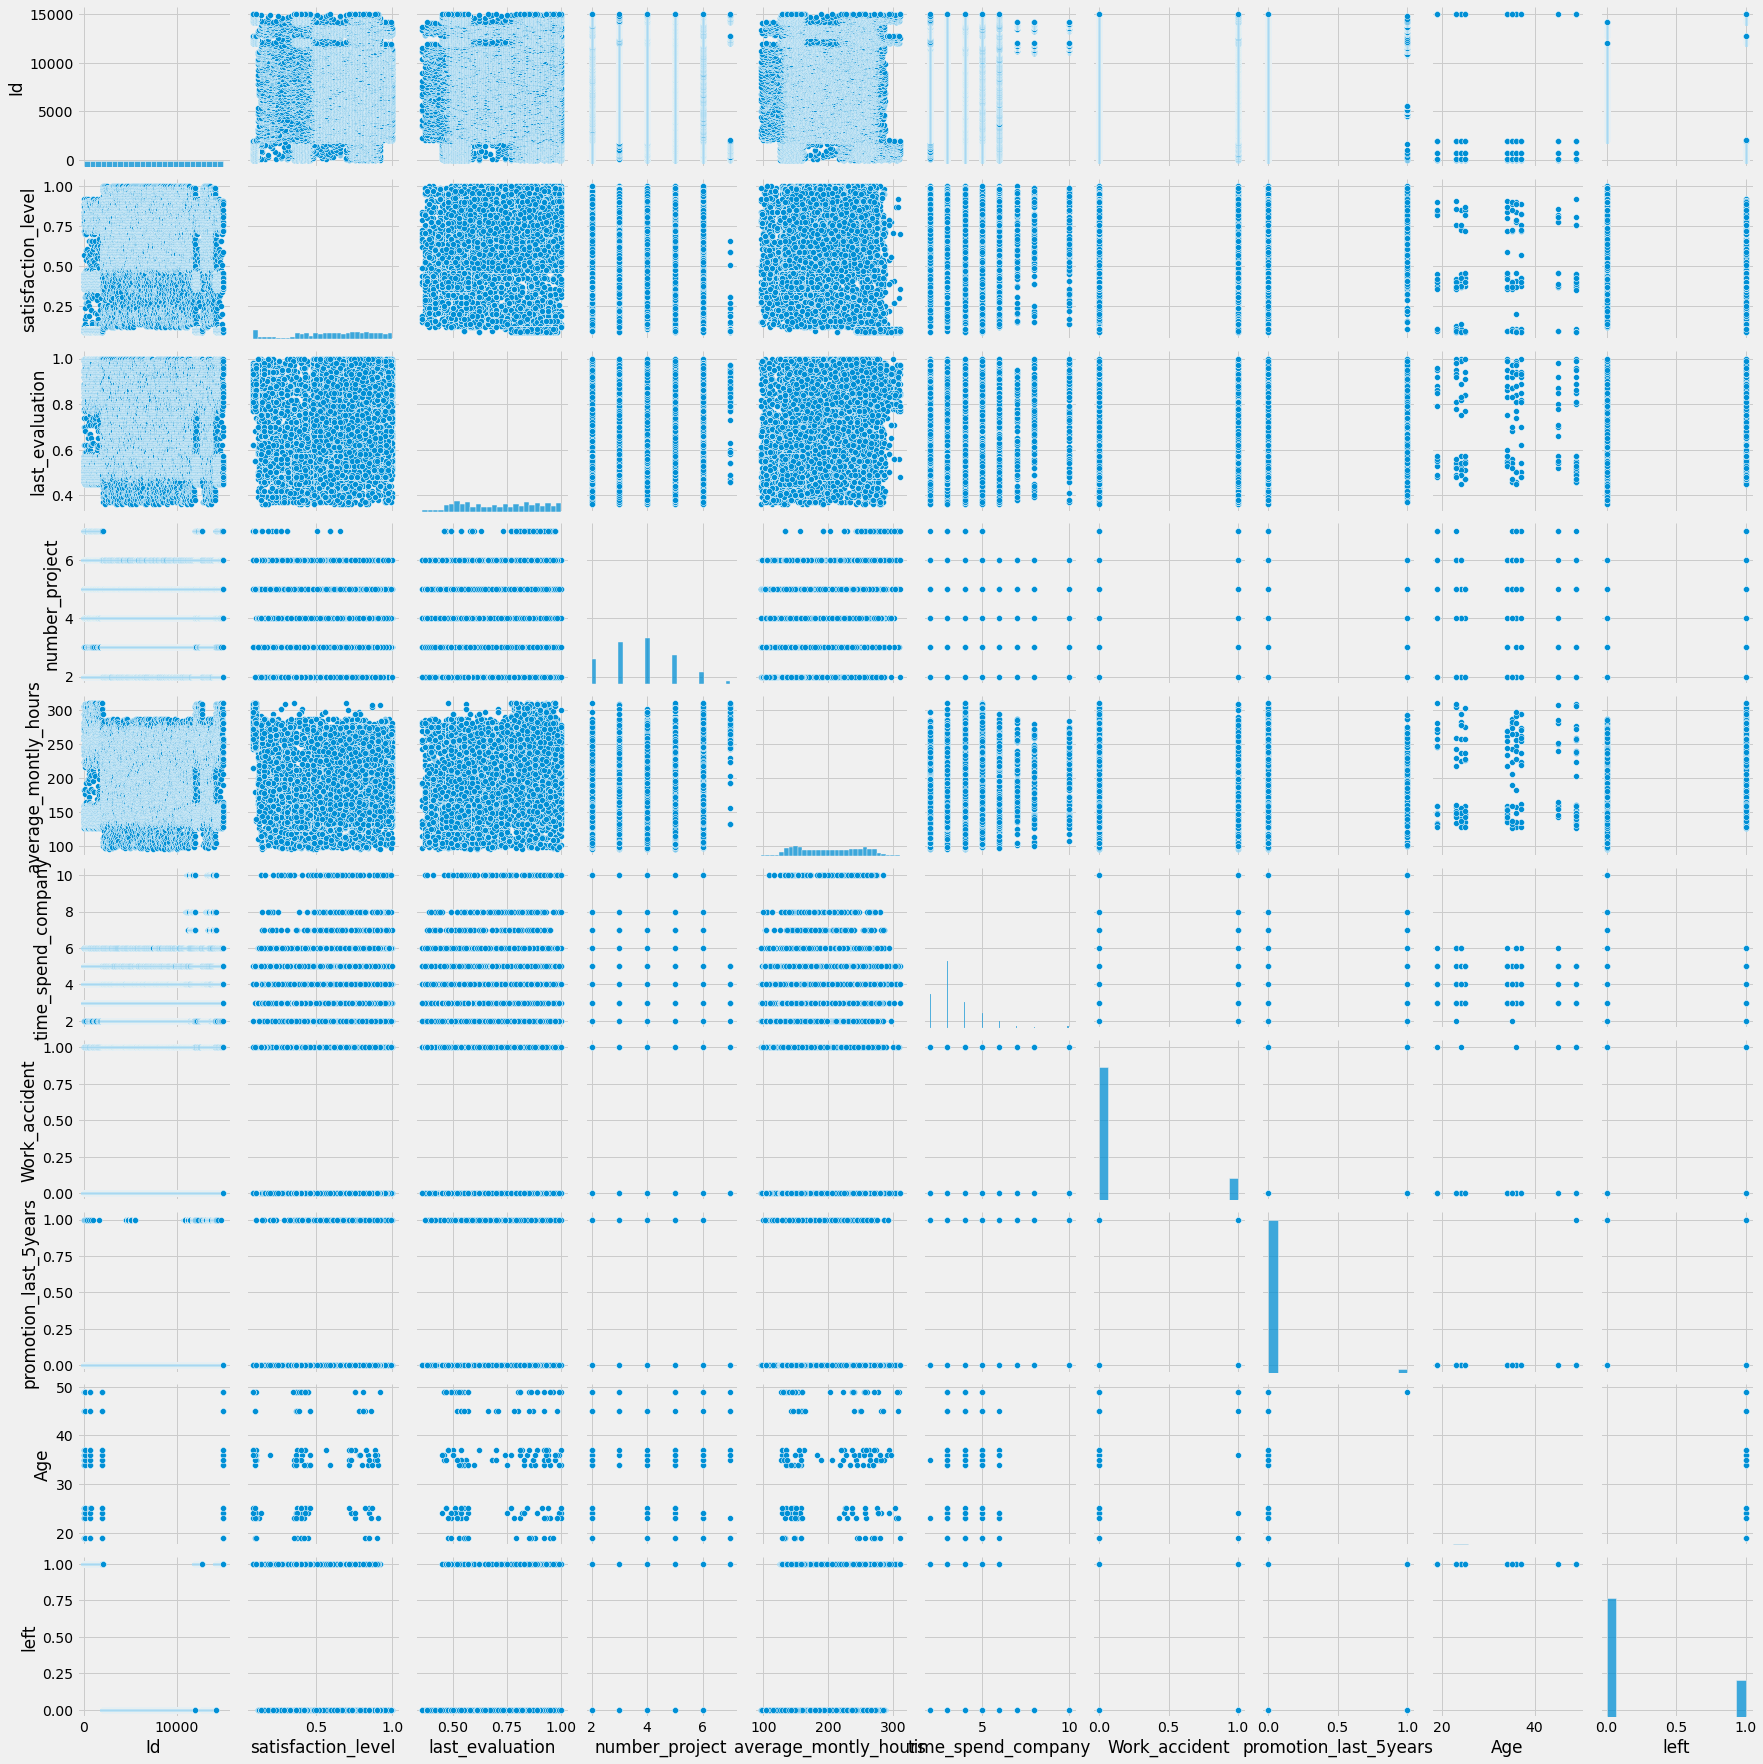

In [82]:
#Question2
sns.pairplot(df,diag_kind='auto')

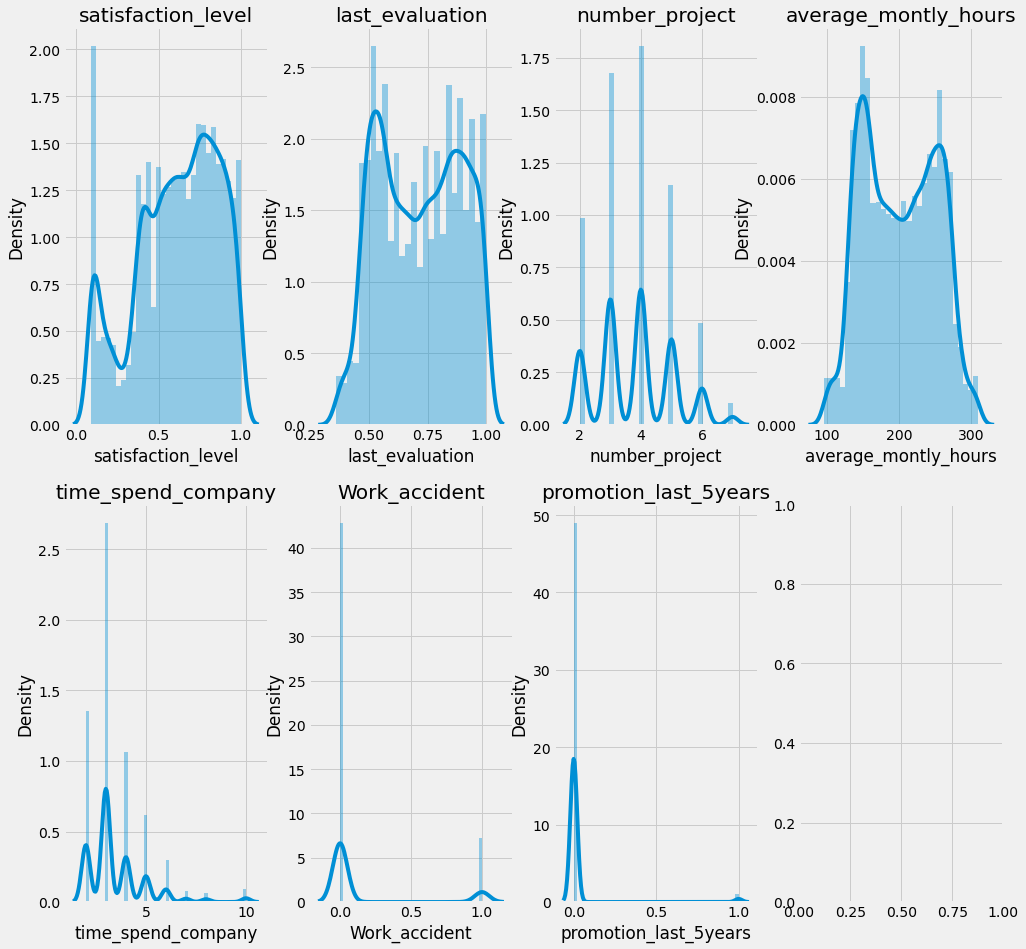

In [83]:
fig, axes = plt.subplots(nrows = 2, ncols = 4) 
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, df.columns[1:8]):
    sns.distplot(df[col], ax = ax)
    ax.set_title(col)

<AxesSubplot:>

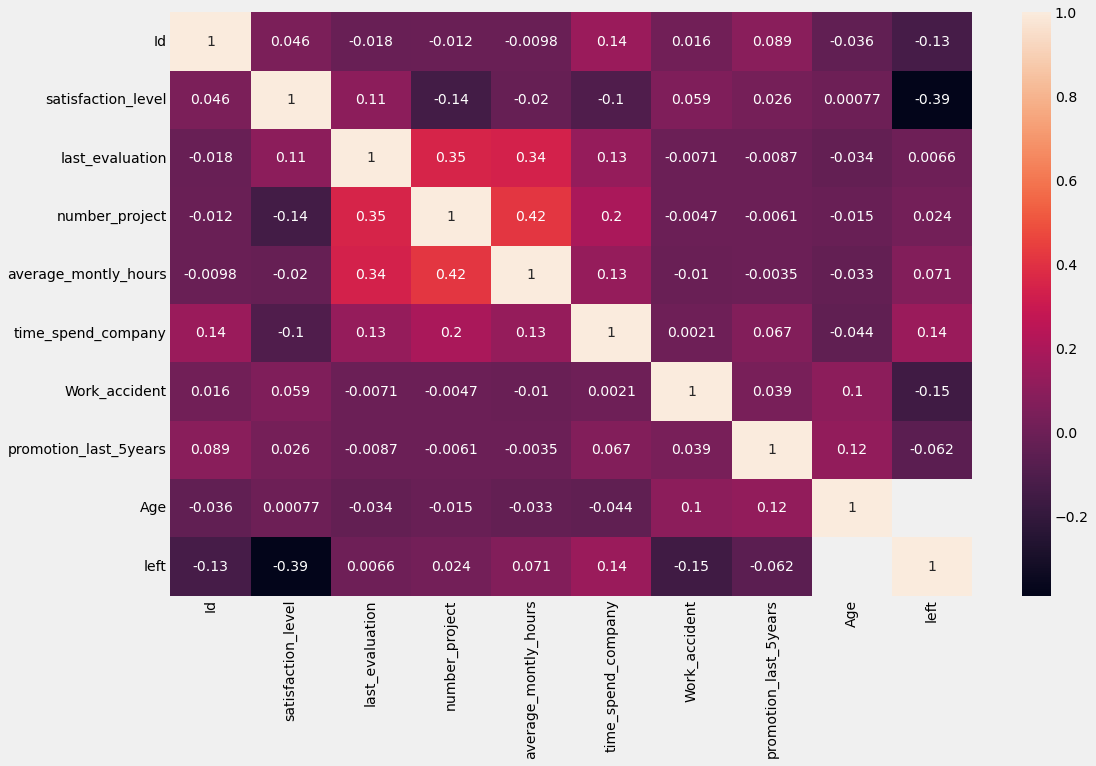

In [84]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

In [85]:
for c in df.columns:
    print(c)
    print(df[c].nunique())
    print()

Id
14999

satisfaction_level
92

last_evaluation
65

number_project
6

average_montly_hours
215

time_spend_company
8

Work_accident
2

promotion_last_5years
2

Department
10

salary
3

Age
10

left
2



In [86]:
for c in df.columns:
    print(c)
    print(df[c].value_counts())
    print()

Id
1        1
10005    1
9993     1
9994     1
9995     1
        ..
5005     1
5006     1
5007     1
5008     1
14999    1
Name: Id, Length: 14999, dtype: int64

satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

last_evaluation
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

average_montly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: average_montly_hours, Length: 215, dtype: int64

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_compa

In [87]:
df.nunique()

Id                       14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
promotion_last_5years        2
Department                  10
salary                       3
Age                         10
left                         2
dtype: int64

In [88]:
df['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

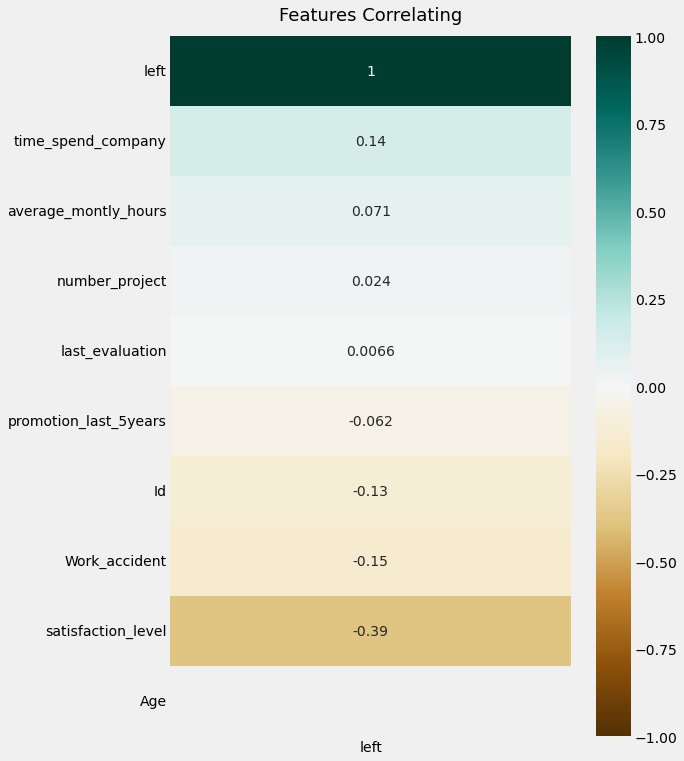

In [89]:
#Question 3
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['left']].sort_values(by='left', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating', fontdict={'fontsize':18}, pad=16);

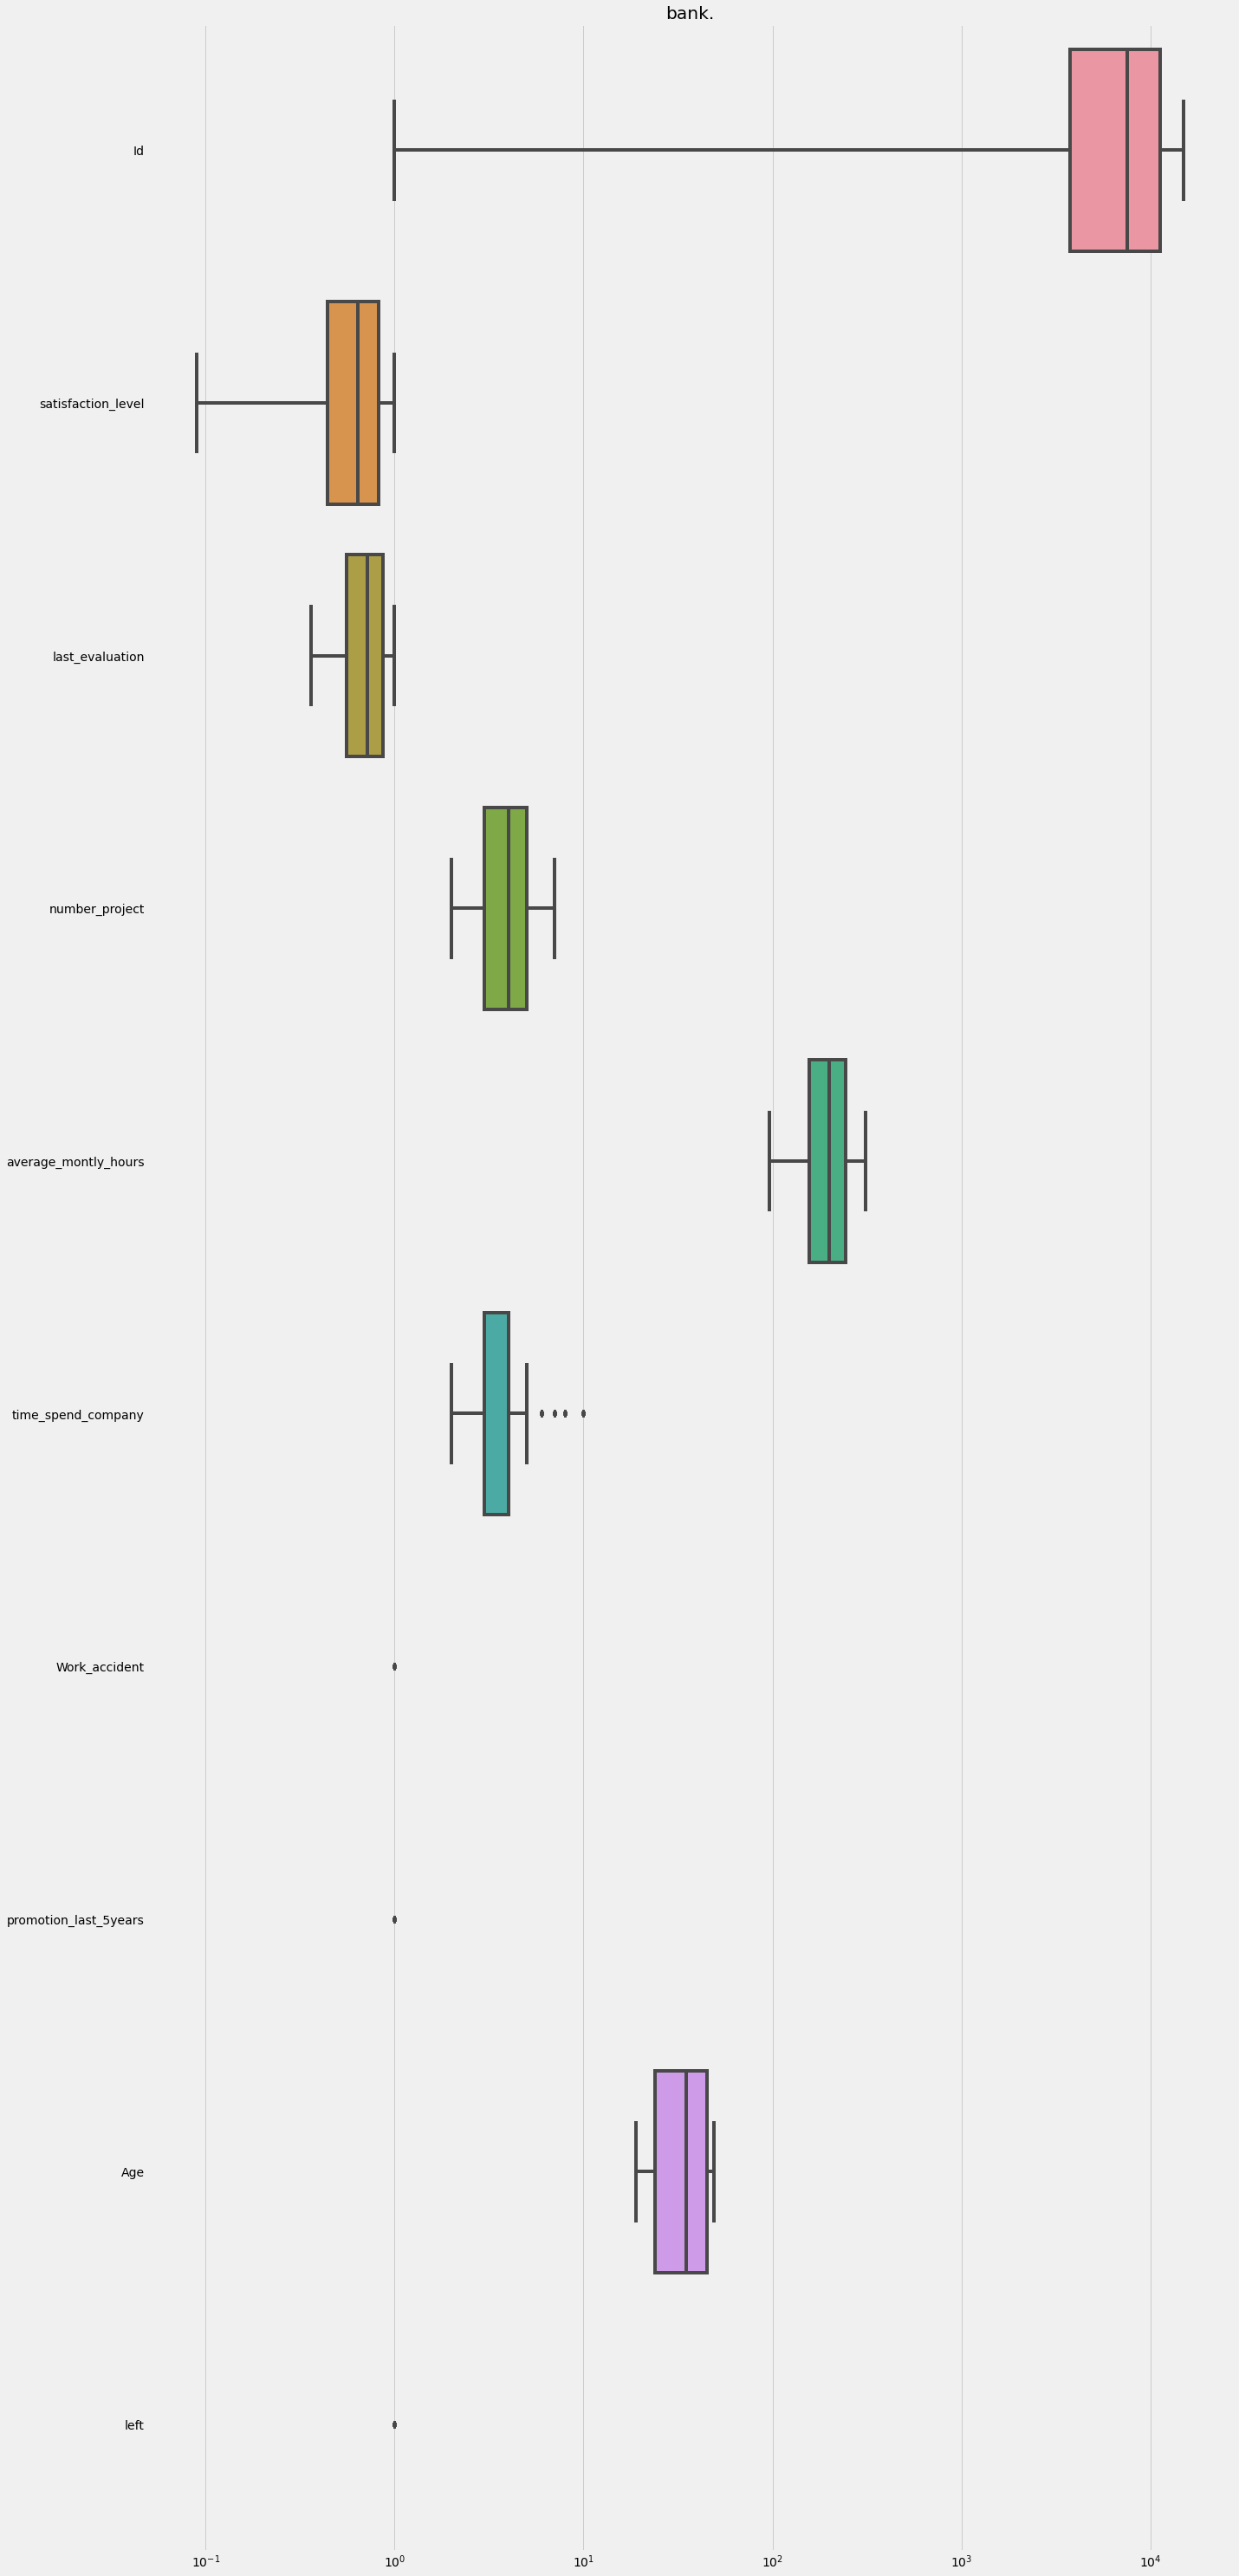

In [90]:
plt.figure(figsize=(20,50))
ax=sns.boxplot(data=df, orient='h')
ax.set_title('bank.')
ax.set(xscale='log')
plt.show()

In [91]:
df.drop(['Age','Id'],inplace=True,axis=1)

In [92]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [93]:
df = pd.get_dummies(df, columns=['Department'],drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,low,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,medium,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,low,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,low,1,0,0,0,0,0,0,1,0,0


In [94]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [95]:
scale_mapper = {"low":1, "medium":2, "high":3}
df["salary"] = df["salary"].replace(scale_mapper)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,1,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,1,0,0,0,0,0,0,0,1,0


In [97]:
df.average_montly_hours.describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.average_montly_hours=scaler.fit_transform(df.average_montly_hours.values.reshape(-1,1))
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,0.285047,3,0,0,1,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,0.775701,6,0,0,2,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,0.822430,4,0,0,2,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,0.593458,5,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,0.294393,3,0,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,0.257009,3,0,0,1,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,0.299065,3,0,0,1,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,0.219626,3,0,0,1,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,0.859813,4,0,0,1,1,0,0,0,0,0,0,0,1,0


In [117]:
X=df.drop(['left'],axis=1)
y=df['left']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=19,shuffle=True)

In [119]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)


In [123]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [125]:
#Question 4
lrc = LogisticRegression(random_state = 19, max_iter = 1000)
dtc = DecisionTreeClassifier(random_state = 19)
gnb = GaussianNB()
xgb = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [130]:
lrc_pred = lrc.fit(X_train_under, y_train_under).predict(X_test)
dtc_pred = dtc.fit(X_train_under, y_train_under).predict(X_test)
gnb_pred = gnb.fit(X_train_under, y_train_under).predict(X_test)
xgb_pred = xgb.fit(X_train_under, y_train_under).predict(X_test)

[11:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimarors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [132]:
print("Logistic Regression classifier evaluation:")
print("Confusion matrix:", "\n", confusion_matrix(lrc_pred, y_test))
print(classification_report(lrc_pred, y_test))
print("AUC score:", round(roc_auc_score(lrc_pred, y_test)*100, 2), "%")

print("\n","Decision tree classifier evaluation:")
print("Confusion matrix:", "\n", confusion_matrix(dtc_pred, y_test))
print(classification_report(dtc_pred, y_test))
print("AUC score:", round(roc_auc_score(dtc_pred, y_test)*100, 2), "%")

print("\n","Gaussian Naive Bayes evaluation:")
print("Confusion matrix:", "\n", confusion_matrix(gnb_pred, y_test))
print(classification_report(gnb_pred, y_test))
print("AUC score:", round(roc_auc_score(gnb_pred, y_test)*100, 2), "%")

print("\n","XGBoost:")
print("Confusion matrix:", "\n", confusion_matrix(xgb_pred, y_test))
print(classification_report(xgb_pred, y_test))
print("AUC score:", round(roc_auc_score(xgb_pred, y_test)*100, 2), "%")

Logistic Regression classifier evaluation:
Confusion matrix: 
 [[2492  218]
 [ 886  904]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      2710
           1       0.81      0.51      0.62      1790

    accuracy                           0.75      4500
   macro avg       0.77      0.71      0.72      4500
weighted avg       0.76      0.75      0.74      4500

AUC score: 71.23 %

 Decision tree classifier evaluation:
Confusion matrix: 
 [[3208   23]
 [ 170 1099]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3231
           1       0.98      0.87      0.92      1269

    accuracy                           0.96      4500
   macro avg       0.96      0.93      0.95      4500
weighted avg       0.96      0.96      0.96      4500

AUC score: 92.95 %

 Gaussian Naive Bayes evaluation:
Confusion matrix: 
 [[1733  153]
 [1645  969]]
              precision    recall  f1-score   supp